In [1]:
import pandas as pd
import time
from IPython.display import clear_output

from matplotlib import pyplot as plt
%matplotlib inline

from kraken_ws import *

50
0 0


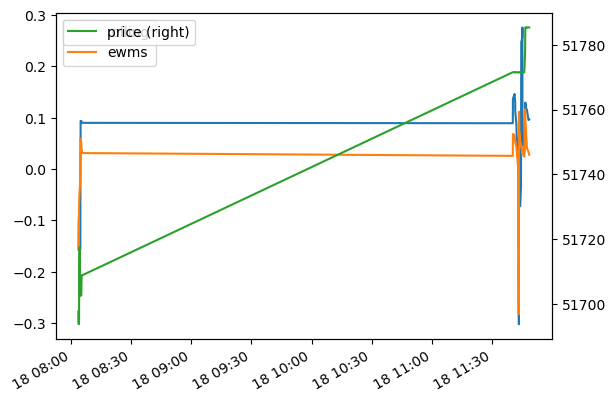

In [2]:
pair = 'BTC/USD'

kws = Kraken_WS()
kws.trade_sub([pair])
kws.start()

while True:
    if len(kws.trade_data[pair])>0:
        clear_output(wait=True)
        print(len(kws.trade_data[pair]))
        try:
            print(100-(100/(1+(kws.buy_ewma/kws.sell_ewma))))
        except: pass
        print(kws.buy_ewma,kws.sell_ewma)
        #display(kws.trade_data[pair])
        temp = kws.trade_data[pair].copy()
        temp['buys'] = temp['sells'] = 0.0
        temp.loc[temp['side']=='b','buys'] = temp.loc[temp['side']=='b','volume'].astype('float')
        temp.loc[temp['side']=='s','sells'] = temp.loc[temp['side']=='s','volume'].astype('float')
        #display(temp['buys'].ewm(alpha=0.1).mean()-temp['sells'].ewm(alpha=0.1).mean())
        #plt.plot((temp['buys']-temp['sells']).ewm(alpha=0.1).mean())
        (temp['buys'].rolling(10).sum()-temp['sells'].rolling(10).sum()).plot()
        (temp['buys'].ewm(span=10).sum()-temp['sells'].ewm(span=10).sum()).plot()
        plt.legend(['rolling','ewms'])
        temp['price'].astype('float').plot(secondary_y=True)
        plt.legend()
        plt.show()
    time.sleep(5)